In [6]:
import pandas as pd
import numpy as np
import loompy
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import matplotlib as mpl
import loompy
import scipy.sparse as sparse

import sys
sys.path.append('/home/bojk/Data/minimeta_pyfiles/')

import sinaplot as sin

In [7]:
mpl.rcParams['axes.labelsize'] = 22
mpl.rcParams['xtick.labelsize'] = 22
mpl.rcParams['ytick.labelsize'] = 22
mpl.rcParams['axes.titlesize'] = 24
mpl.rcParams['figure.titlesize'] = 30
mpl.rcParams['legend.fontsize'] = 14

In [8]:
metadata = pd.read_csv('metadata.csv',index_col=0)
metadata.head()

,nGene,nReads,orig.ident,Tumor,Plate,Well,S,percent.mito,percent.ERCC,percent.ribo,res.1,oldIdent,annotation
TuPa1_Plate2_B10_S000,3487,359151,TuPa1,TuPa1,Plate2,B10,S000,0.031750,0.054845,0.010291,11,11,Mesen1
TuPa1_Plate2_G3_S000,3669,93115,TuPa1,TuPa1,Plate2,G3,S000,0.056586,0.048078,0.015218,11,11,Mesen1
TuPa1_Plate2_C7_S000,3416,123935,TuPa1,TuPa1,Plate2,C7,S000,0.034445,0.039852,0.013297,11,11,Mesen1
TuPa1_Plate2_H5_S000,2655,142586,TuPa1,TuPa1,Plate2,H5,S000,0.047985,0.085329,0.016390,11,11,Mesen1
TuPa1_Plate2_B3_S000,2893,132529,TuPa1,TuPa1,Plate2,B3,S000,0.083461,0.085717,0.016479,11,11,Mesen1


In [33]:
metadata.describe()

,nGene,nReads,percent.mito,percent.ERCC,percent.ribo,res.1,oldIdent
count,1292.000000,1.292000e+03,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000
mean,3658.748452,1.132358e+06,0.236544,0.058745,0.044037,5.206656,5.206656
std,1310.458600,9.851884e+05,0.201219,0.090160,0.028045,3.570234,3.570234
min,1004.000000,5.246000e+04,0.000006,0.000000,0.000033,1.000000,1.000000
25%,2753.500000,3.302390e+05,0.101249,0.009492,0.027907,3.000000,3.000000
50%,3592.000000,9.138620e+05,0.176955,0.024498,0.040906,4.000000,4.000000
75%,4608.500000,1.643806e+06,0.276729,0.062584,0.055064,8.000000,8.000000
max,8737.000000,4.960210e+06,0.976490,0.808701,0.229316,13.000000,13.000000


In [140]:
metadata.Tumor.unique()
#metadata['orig.ident'].unique()

array(['TuPa1', 'TuPa2', 'NuPa22', 'TuPa29', 'TuPa31', 'TuPa28', 'TuPa3',
       'TuPa6', 'TuPa4', 'TuPa5', 'TuPa23', 'TuPa27', 'TuPa20', 'TuPa26'],
      dtype=object)

In [7]:
# basic plotting.

In [20]:
#pd.read_csv('Datasets/TuPaMetaDataDivya/CombinedCountTable.csv')

In [9]:
tsne_coords  = pd.read_csv('Datasets/TuPaMetaDataDivya/tSNEcoordinates.csv',index_col=0)
tsne_coords.head()

,tSNE_1,tSNE_2
TuPa1_Plate2_B10_S000,16.024758,-4.296897
TuPa1_Plate2_G3_S000,16.758752,-5.378935
TuPa1_Plate2_C7_S000,16.047937,-4.953026
TuPa1_Plate2_H5_S000,15.600643,-4.512714
TuPa1_Plate2_B3_S000,15.184382,-4.821161


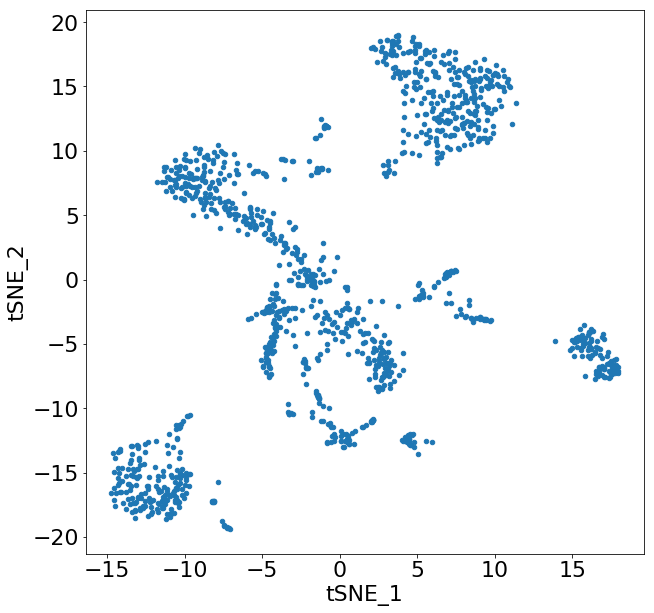

In [10]:
tsne_coords.plot.scatter('tSNE_1','tSNE_2',figsize=(10,10))
plt.show()

In [11]:
meta_tSNE = metadata.join(tsne_coords)

In [90]:
keys = np.sort(metadata.annotation.unique()); values = sns.color_palette('Paired',len(keys)+1)
lut = dict(zip(keys,values[:-2]+[values[-1]]))
colors = meta_tSNE.annotation.map(lut)

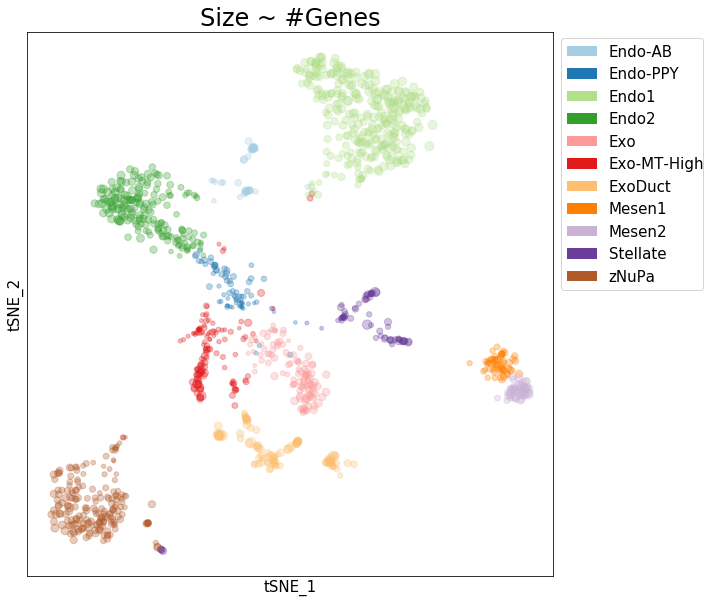

In [182]:
f = plt.figure()

gs = gridspec.GridSpec(1,1)
ax = f.add_subplot(gs[0,0])
tsne_coords.plot.scatter('tSNE_1','tSNE_2',figsize=(10,10),ax=ax,color=colors,s=meta_tSNE.nGene.divide(80),alpha=.3)#,label=colors.keys)
for x,y in lut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
    plt.legend(handles[:],labels[:],bbox_to_anchor=(1, .9, .3, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.yticks([]);plt.xticks([])
plt.title('Size ~ #Genes')
plt.gcf().subplots_adjust(left=.05,right=0.78)
plt.show()
f.savefig('Datasets/TuPaMetaDataDivya/figures/tSNE_cellType_nGenes.png')

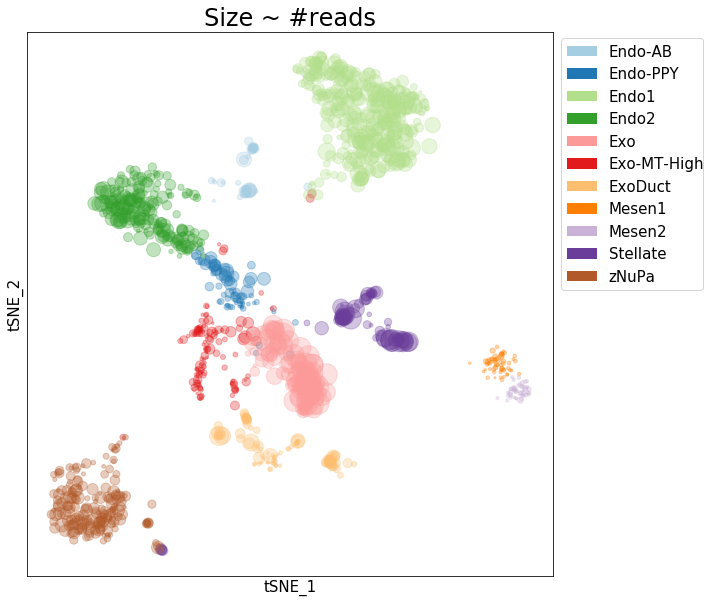

In [181]:
f = plt.figure()

gs = gridspec.GridSpec(1,1)
ax = f.add_subplot(gs[0,0])
tsne_coords.plot.scatter('tSNE_1','tSNE_2',figsize=(10,10),ax=ax,color=colors,s=meta_tSNE.nReads.divide(1e4),alpha=.3)#,label=colors.keys)
for x,y in lut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    plt.legend(handles[:],labels[:],bbox_to_anchor=(1, .9, .3, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.yticks([]);plt.xticks([])
plt.title('Size ~ #reads')
plt.gcf().subplots_adjust(left=.05,right=0.78)
plt.show()
f.savefig('Datasets/TuPaMetaDataDivya/figures/tSNE_cellType_nReads.png')

In [162]:
keys = np.sort(metadata.Tumor.unique()); values = sns.color_palette('cubehelix',len(keys)+5)
lutPa = dict(zip(keys,values[2:-2]))
colorsPa = meta_tSNE.Tumor.map(lutPa)

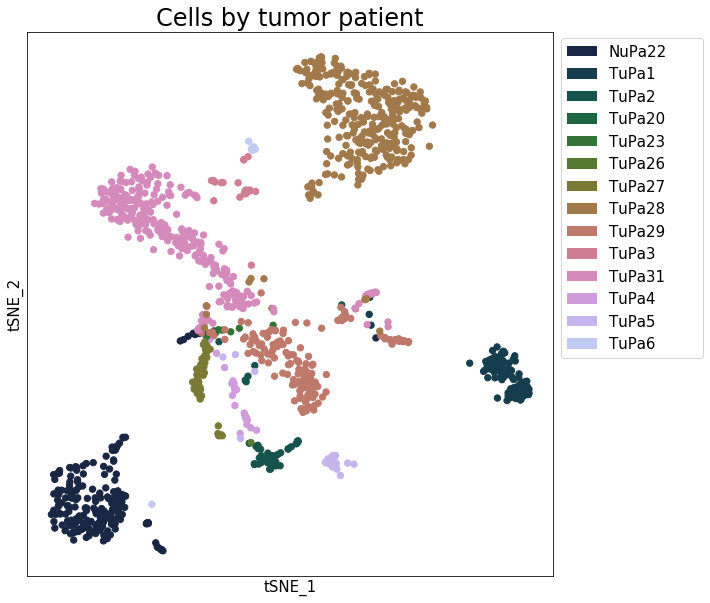

In [179]:
f = plt.figure()

gs = gridspec.GridSpec(1,1)
ax = f.add_subplot(gs[0,0])
tsne_coords.plot.scatter('tSNE_1','tSNE_2',figsize=(10,10),ax=ax,color=colorsPa,s=40,alpha=1)#,label=colors.keys)
for x,y in lutPa.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    plt.legend(handles[:],labels[:],bbox_to_anchor=(1, .9, .3, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.yticks([]);plt.xticks([])
plt.title('Cells by tumor patient')
plt.gcf().subplots_adjust(left=.05,right=0.78)
plt.show()
f.savefig('Datasets/TuPaMetaDataDivya/figures/tSNE_tumorPatient.png')

In [170]:
keys = np.sort(metadata.Plate.unique()); values = sns.color_palette('Dark2_r',len(keys))
lutPl = dict(zip(keys,values))
colorsPl = meta_tSNE.Plate.map(lutPl)

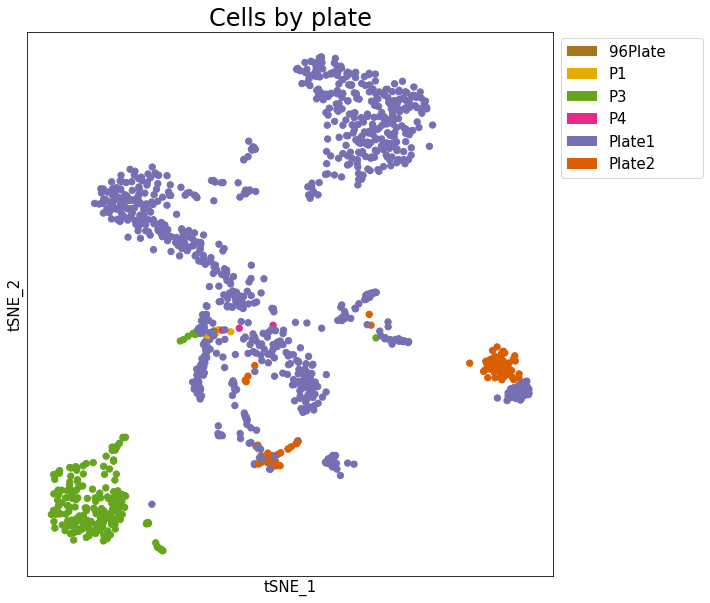

In [180]:
f = plt.figure()
gs = gridspec.GridSpec(1,1)
ax = f.add_subplot(gs[0,0])
tsne_coords.plot.scatter('tSNE_1','tSNE_2',figsize=(10,10),ax=ax,color=colorsPl,s=40,alpha=1)#,label=colors.keys)
for x,y in lutPl.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    plt.legend(handles[:],labels[:],bbox_to_anchor=(1, .9, .3, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.yticks([]);plt.xticks([])
plt.title('Cells by plate')
plt.gcf().subplots_adjust(left=.05,right=0.78)
plt.show()
f.savefig('Datasets/TuPaMetaDataDivya/figures/tSNE_plate.png')

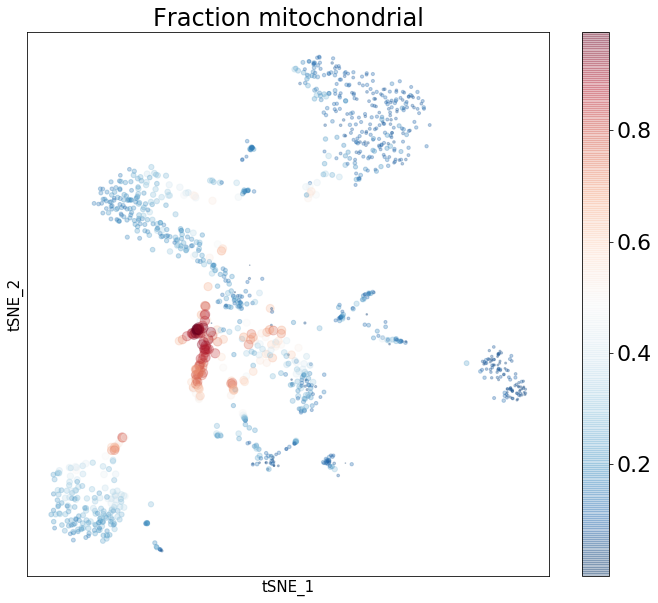

In [186]:
cm = plt.cm.get_cmap('RdYlBu')
f,ax = plt.subplots()
meta_tSNE.plot.scatter('tSNE_1','tSNE_2',figsize=(12,10),ax=ax,s=meta_tSNE['percent.mito'].astype(float)*1e2,alpha=.3,cmap='RdBu_r',c=meta_tSNE['percent.mito'])
plt.yticks([]);plt.xticks([])
plt.title('Fraction mitochondrial')
plt.gcf().subplots_adjust(right=0.88)
plt.show()
f.savefig('Datasets/TuPaMetaDataDivya/figures/tSNE_percMito.png')

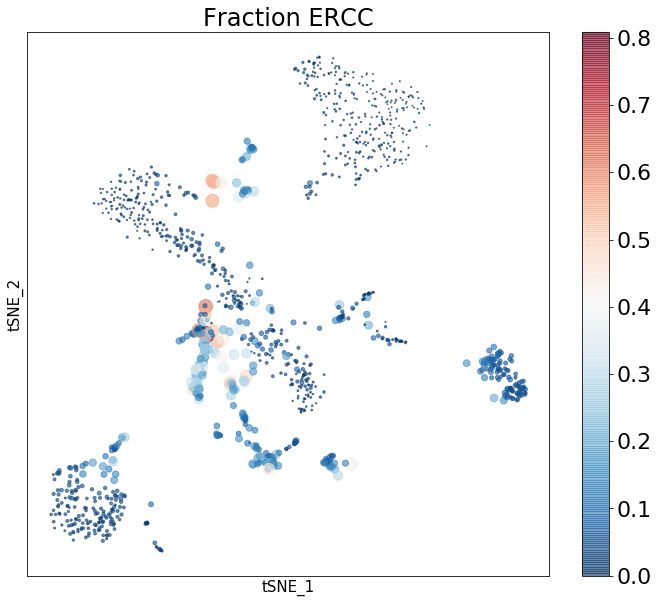

In [187]:
f,ax = plt.subplots()
meta_tSNE.plot.scatter('tSNE_1','tSNE_2',figsize=(12,10),ax=ax,s=meta_tSNE['percent.ERCC'].astype(float)*3e2,alpha=.6,cmap='RdBu_r',c=meta_tSNE['percent.ERCC'])
plt.yticks([]);plt.xticks([])
plt.title('Fraction ERCC')
plt.gcf().subplots_adjust(right=0.88)
plt.show()
f.savefig('Datasets/TuPaMetaDataDivya/figures/tSNE_percERCC.png')

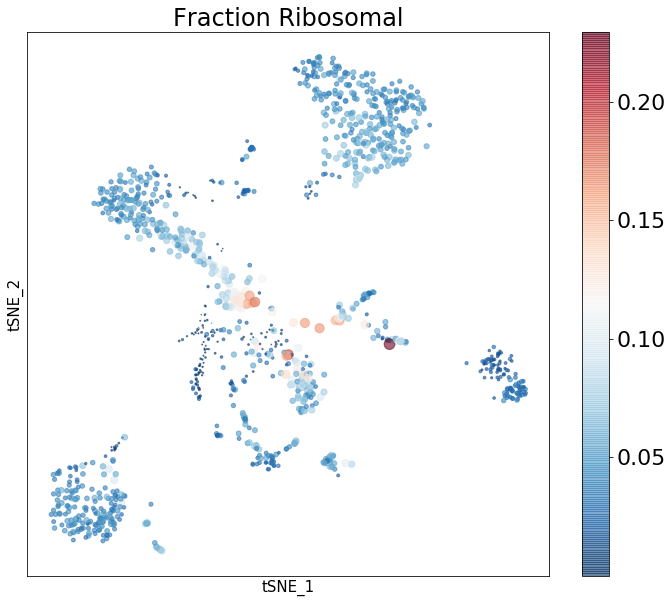

In [188]:
f,ax = plt.subplots()
meta_tSNE.plot.scatter('tSNE_1','tSNE_2',figsize=(12,10),ax=ax,s=meta_tSNE['percent.ribo'].astype(float)*5e2,alpha=.6,cmap='RdBu_r',c=meta_tSNE['percent.ribo'])
plt.yticks([]);plt.xticks([])
plt.title('Fraction Ribosomal')
plt.gcf().subplots_adjust(right=0.88)
plt.show()
f.savefig('Datasets/TuPaMetaDataDivya/figures/tSNE_percRibo.png')

In [ ]:
# make standard violins that everyone does

In [189]:
meta_tSNE.head(2)

,nGene,nReads,orig.ident,Tumor,Plate,Well,S,percent.mito,percent.ERCC,percent.ribo,res.1,oldIdent,annotation,tSNE_1,tSNE_2
TuPa1_Plate2_B10_S000,3487,359151,TuPa1,TuPa1,Plate2,B10,S000,0.031750,0.054845,0.010291,11,11,Mesen1,16.024758,-4.296897
TuPa1_Plate2_G3_S000,3669,93115,TuPa1,TuPa1,Plate2,G3,S000,0.056586,0.048078,0.015218,11,11,Mesen1,16.758752,-5.378935


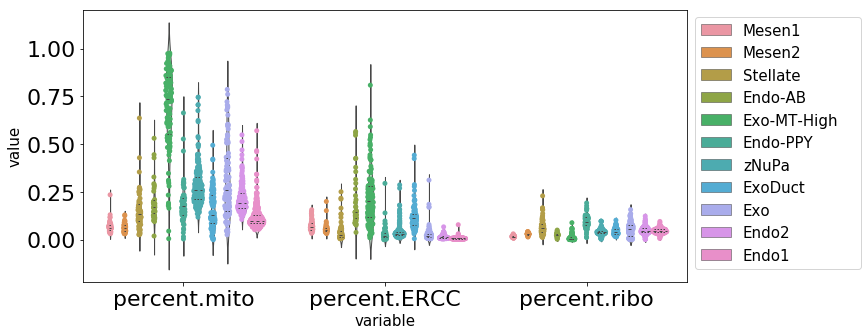

In [206]:
hue_name = 'annotation'
dfviolin = pd.melt(meta_tSNE,value_vars=['percent.mito','percent.ERCC','percent.ribo']
                   ,id_vars=hue_name)
dfviolin['value_int'] = dfviolin['value'].astype(int)
cat1,cat2 = dfviolin[hue_name].unique()[0],dfviolin[hue_name].unique()[1]
f = plt.figure(figsize=(12,5))
sin.sinaplot(x='variable',y='value', hue=hue_name, 
             data=dfviolin,split=False,inner='quartile',violin=True,violin_facealpha=0.250)#,bw=.15)
plt.legend(bbox_to_anchor=(1, .9, .3, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.gcf().subplots_adjust(left=.1,right=0.8)
f.savefig('Datasets/TuPaMetaDataDivya/figures/violin_percs_cellType.png')

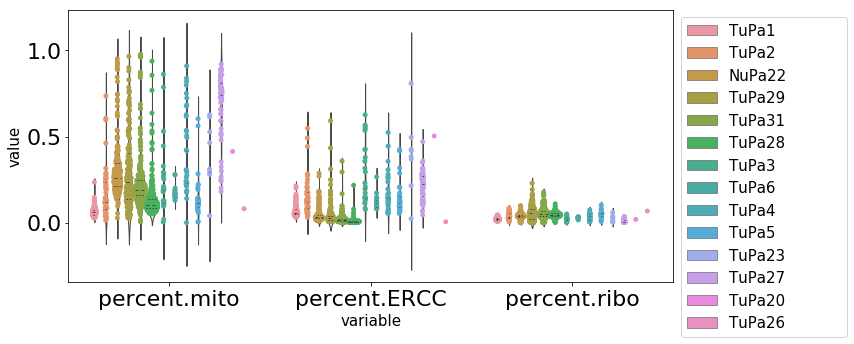

In [207]:
hue_name = 'Tumor'
dfviolin = pd.melt(meta_tSNE,value_vars=['percent.mito','percent.ERCC','percent.ribo']
                   ,id_vars=hue_name)
dfviolin['value_int'] = dfviolin['value'].astype(int)
cat1,cat2 = dfviolin[hue_name].unique()[0],dfviolin[hue_name].unique()[1]
f = plt.figure(figsize=(12,5))
sin.sinaplot(x='variable',y='value', hue=hue_name, 
             data=dfviolin,split=False,inner='quartile',violin=True,violin_facealpha=0.250)#,bw=.15)
plt.legend(bbox_to_anchor=(1, .9, .3, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.gcf().subplots_adjust(left=.1,right=0.8)
f.savefig('Datasets/TuPaMetaDataDivya/figures/violin_percs_tumorPa.png')

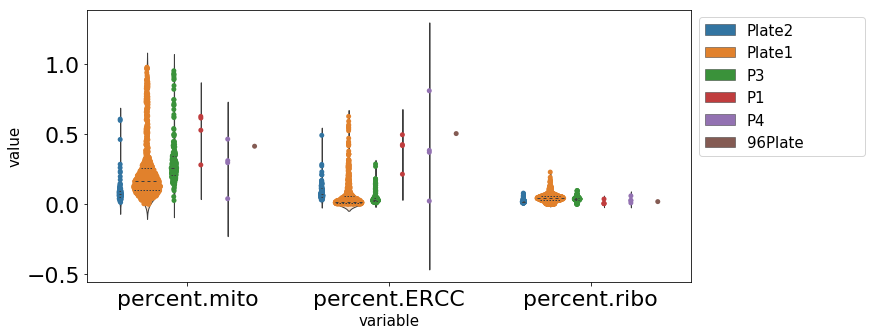

In [208]:
hue_name = 'Plate'
dfviolin = pd.melt(meta_tSNE,value_vars=['percent.mito','percent.ERCC','percent.ribo']
                   ,id_vars=hue_name)
dfviolin['value_int'] = dfviolin['value'].astype(int)
cat1,cat2 = dfviolin[hue_name].unique()[0],dfviolin[hue_name].unique()[1]
f = plt.figure(figsize=(12,5))
sin.sinaplot(x='variable',y='value', hue=hue_name, 
             data=dfviolin,split=False,inner='quartile',violin=True,violin_facealpha=0.250)#,bw=.15)
plt.legend(bbox_to_anchor=(1, .9, .3, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.gcf().subplots_adjust(left=.1,right=0.8)
f.savefig('Datasets/TuPaMetaDataDivya/figures/violin_percs_Plate.png')

In [228]:
# take top-expressing genes of particular cell class and plot log2+1 count 
# then add mixed Gauss fit 
filename = "Datasets/TuPaMetaDataDivya/CombinedCountTable2.loom"
ds2 = loompy.connect(filename)

In [248]:
b=[]
for s in ds2.col_attrs.items():
    b.append(s)

In [254]:

sys.argv[1]

[('Cells', array(['TuPa1_Plate1_B9_S000', 'TuPa3_Plate1_A5_S000',
         'TuPa6_Plate1_C11_S000', ..., 'TuPa31_Plate1_E10_S174',
         'TuPa28_Plate1_J17_S228', 'TuPa31_Plate1_G1_S211'], dtype=object))]

In [12]:
counttable = pd.read_csv('Datasets/TuPaMetaDataDivya/CombinedCountTable.csv',index_col=0)

In [13]:
counttable.head(2)

,TuPa1_Plate1_B9_S000,TuPa3_Plate1_A5_S000,TuPa6_Plate1_C11_S000,TuPa2_Plate1_C1_S000,TuPa6_Plate1_F9_S000,TuPa3_Plate1_B2_S000,TuPa1_Plate2_B10_S000,TuPa2_Plate2_H9_S000,TuPa1_Plate2_G3_S000,TuPa4_Plate1_A8_S000,...,TuPa31_Plate1_D21_S162,TuPa31_Plate1_A15_S87,TuPa31_Plate1_B8_S103,TuPa31_Plate1_E2_S166,TuPa28_Plate1_H14_S179,TuPa28_Plate1_D1_S74,TuPa31_Plate1_C15_S133,TuPa31_Plate1_E10_S174,TuPa28_Plate1_J17_S228,TuPa31_Plate1_G1_S211
ENSG00000000003,0,0,177,0,0,0,186,53,7,78,...,0,0,0,0,0,0,0,0,0,0
ENSG00000000005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
counttable.sum().sort_values(ascending=False)

TuPa29_Plate1_F5_S28        11476606
TuPa29_Plate1_B10_S241      10849409
TuPa29_Plate1_C15_S269      10389807
TuPa29_Plate1_E6_S6         10125981
TuPa29_Plate1_F12_S35        9958838
TuPa29_Plate1_K6_S144        9857267
TuPa29_Plate1_D20_S297       9494400
TuPa29_Plate1_C6_S260        9353529
TuPa29_Plate1_A2_S210        9333105
TuPa29_Plate1_K12_S150       9280730
TuPa29_Plate1_F10_S33        9183933
TuPa29_Plate1_E21_S21        8989565
TuPa29_Plate1_C14_S268       8901733
TuPa29_Plate1_H11_S80        8857093
TuPa29_Plate1_A11_S219       8854151
TuPa29_Plate1_F18_S41        8837543
TuPa29_Plate1_B5_S236        8826565
TuPa29_Plate1_D2_S279        8807932
TuPa29_Plate1_C9_S263        8597920
TuPa29_Plate1_M5_S189        8463989
TuPa29_Plate1_K5_S143        8259247
TuPa29_Plate1_F4_S27         8192444
TuPa29_Plate1_E12_S12        8187677
TuPa29_Plate1_K9_S147        8153177
TuPa29_Plate1_B9_S240        8150496
TuPa29_Plate1_D13_S290       8126501
TuPa29_Plate1_I15_S107       8078262
T

In [266]:
counttable[counttable.T.sum()==0].index

Index(['ENSG00000173389', 'ENSG00000183395', 'ENSG00000196395',
       'ENSG00000199348', 'ENSG00000199634', 'ENSG00000199979',
       'ENSG00000200168', 'ENSG00000200313', 'ENSG00000200444',
       'ENSG00000200483',
       ...
       'ENSG00000278278', 'ENSG00000278754', 'ENSG00000278825',
       'ENSG00000279002', 'ENSG00000279547', 'ENSG00000280251',
       'ENSG00000280671', 'ENSG00000282834', 'ENSG00000283290',
       'ENSG00000283300'],
      dtype='object', length=185)

In [15]:
ct2 = counttable.drop(counttable[counttable.T.sum()==0].index,axis=0)
ct2 = ct2[ct2.index.str.contains('ENSG')]

In [273]:
ct2.sum().sort_values(ascending=False)

TuPa29_Plate1_F5_S28        8770905
TuPa29_Plate1_B10_S241      8213098
TuPa29_Plate1_C15_S269      7724852
TuPa29_Plate1_A2_S210       7198786
TuPa29_Plate1_C6_S260       7083048
TuPa29_Plate1_D20_S297      7030171
TuPa29_Plate1_F12_S35       6902451
TuPa29_Plate1_E6_S6         6848496
TuPa29_Plate1_E21_S21       6802300
TuPa29_Plate1_P17_S270      6709833
TuPa29_Plate1_B5_S236       6695156
TuPa29_Plate1_K12_S150      6634540
TuPa29_Plate1_A11_S219      6587354
TuPa29_Plate1_F18_S41       6568078
TuPa29_Plate1_D13_S290      6388018
TuPa29_Plate1_M5_S189       6360473
TuPa29_Plate1_D2_S279       6347054
TuPa29_Plate1_K5_S143       6095127
TuPa29_Plate1_B9_S240       6082580
TuPa29_Plate1_K6_S144       6049833
TuPa29_Plate1_I15_S107      5952659
TuPa29_Plate1_N15_S222      5856775
TuPa29_Plate1_K9_S147       5838391
TuPa29_Plate1_K15_S153      5792416
TuPa29_Plate1_A15_S223      5786651
TuPa29_Plate1_G11_S57       5754461
TuPa29_Plate1_C16_S270      5748493
TuPa29_Plate1_C14_S268      

In [16]:
norm_all = counttable.drop(counttable[counttable.T.sum()==0].index,axis=0).divide(meta_tSNE.nReads.divide(1e6))
norm = ct2.divide(meta_tSNE.nReads.divide(1e6))
#ct2.TuPa6_Plate1_E12_S000
#meta_tSNE

In [341]:
meta_tSNE.nReads.sort_values(ascending=False)

TuPa29_Plate1_H11_S80     4960210
TuPa29_Plate1_K17_S155    4936560
TuPa29_Plate1_J14_S129    4831737
TuPa29_Plate1_D21_S298    4825947
TuPa29_Plate1_E2_S2       4812728
TuPa29_Plate1_G2_S48      4794621
TuPa29_Plate1_M16_S200    4787532
TuPa29_Plate1_B13_S244    4767551
TuPa29_Plate1_O15_S245    4742734
TuPa29_Plate1_B21_S252    4698116
TuPa29_Plate1_C1_S255     4651683
TuPa29_Plate1_D6_S283     4592547
TuPa29_Plate1_F10_S33     4581791
TuPa29_Plate1_N11_S218    4537293
TuPa29_Plate1_B23_S254    4505340
TuPa29_Plate1_M14_S198    4476452
TuPa29_Plate1_H4_S73      4459386
TuPa29_Plate1_C21_S275    4432608
TuPa29_Plate1_N16_S223    4382427
TuPa29_Plate1_F16_S39     4343216
TuPa29_Plate1_B18_S249    4298322
TuPa29_Plate1_P14_S267    4272428
TuPa29_Plate1_C3_S257     4205909
TuPa29_Plate1_H14_S83     4150230
TuPa29_Plate1_O11_S241    4149933
TuPa29_Plate1_G9_S55      4144262
TuPa29_Plate1_N18_S225    4079112
TuPa29_Plate1_F11_S34     4072425
TuPa29_Plate1_D3_S280     4020409
TuPa29_Plate1_

In [360]:
top40 = ct2.loc[ct2.T.sum().sort_values(ascending=False)[:40].index]
normtop40 = norm.loc[norm.T.sum().sort_values(ascending=False)[:40].index]

In [361]:
top40log2 = np.log2(top40+1)
normtop40log2 = np.log2(normtop40+1)

In [280]:
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde

def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

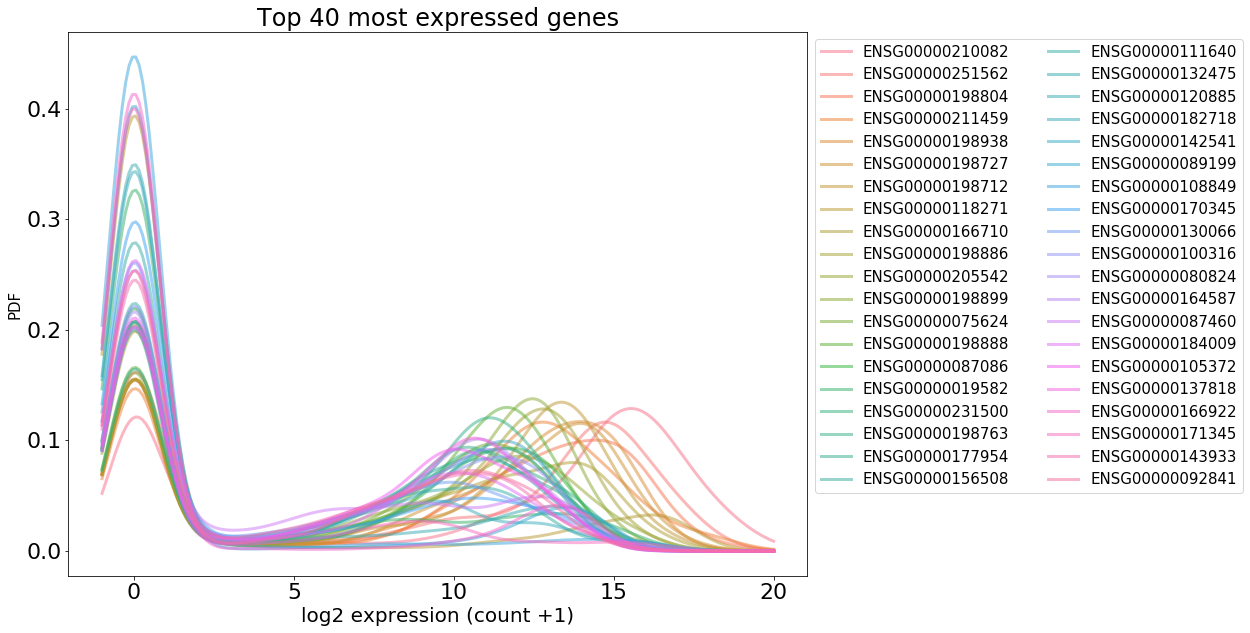

In [319]:
x_grid = np.linspace(-1,20,200)
pdf_df_skl = pd.DataFrame(index=x_grid,columns=keys) # generates pdf dataframe

values = sns.color_palette('husl',len(top40log2.index))
keys = list(top40log2.index)
coldict = dict(zip(keys,values))

f = plt.figure()
gs = gridspec.GridSpec(1,1)
ax1 = f.add_subplot(gs[0,0])

for gene in top40log2.index:
    x = top40log2.loc[gene,:]
    pdf = kde_sklearn(x,x_grid,bandwidth=.8)
    ax1.plot(x_grid, pdf, color=coldict[gene], alpha=0.5, lw=3)
    pdf_df_skl[gene] = pdf # write to dataframe
plt.xlabel('log2 expression (count +1)',fontsize=20)
plt.legend(top40log2.index,bbox_to_anchor=(1, .9, .6, .102), loc=2,
               ncol=2, mode="expand",fontsize=15)
plt.ylabel('PDF')
f.set_figheight(10)
f.set_figwidth(18)
plt.title('Top 40 most expressed genes')

plt.gcf().subplots_adjust(left=.08,right=0.65)
plt.show()
f.savefig('Datasets/TuPaMetaDataDivya/figures/density_top40log2.png')
f.savefig('Datasets/TuPaMetaDataDivya/figures/density_top40log2.pdf')

In [321]:
#pdf_df_skl

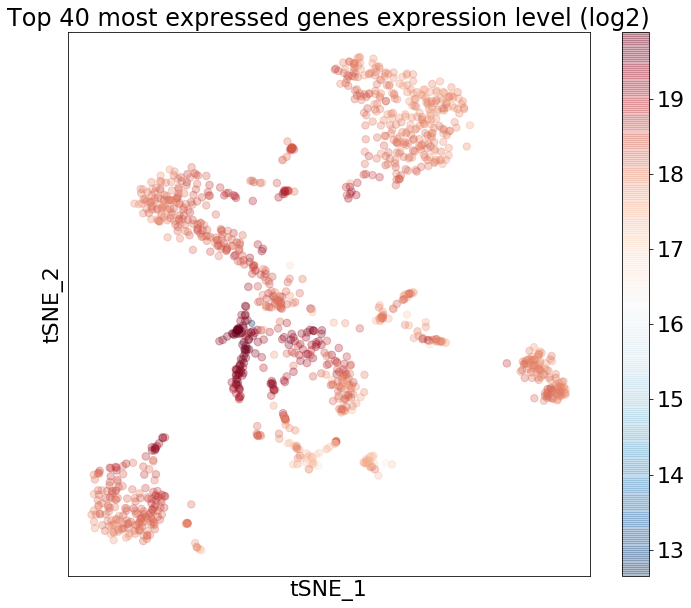

In [363]:
meta_tSNE['top40genes_log2'] = np.log2(top40.sum(axis=0)+1)
meta_tSNE['top40genesnorm_log2'] = np.log2(normtop40.sum(axis=0)+1)
cm = plt.cm.get_cmap('RdYlBu')
f,ax = plt.subplots()
meta_tSNE.plot.scatter('tSNE_1','tSNE_2',figsize=(12,10),ax=ax,s=meta_tSNE['top40genesnorm_log2'].astype(float)*3,alpha=.3,cmap='RdBu_r',c=meta_tSNE['top40genesnorm_log2'])
plt.yticks([]);plt.xticks([])
plt.title('Top 40 most expressed genes expression level (log2)')
plt.gcf().subplots_adjust(right=0.88)
plt.show()
f.savefig('Datasets/TuPaMetaDataDivya/figures/tSNE_top40log2_norm.png')

In [322]:
#meta_tSNE

In [340]:
meta_tSNE.head()

,nGene,nReads,orig.ident,Tumor,Plate,Well,S,percent.mito,percent.ERCC,percent.ribo,res.1,oldIdent,annotation,tSNE_1,tSNE_2,top40genes_log2
TuPa1_Plate2_B10_S000,3487,359151,TuPa1,TuPa1,Plate2,B10,S000,0.031750,0.054845,0.010291,11,11,Mesen1,16.024758,-4.296897,14.820977
TuPa1_Plate2_G3_S000,3669,93115,TuPa1,TuPa1,Plate2,G3,S000,0.056586,0.048078,0.015218,11,11,Mesen1,16.758752,-5.378935,13.256209
TuPa1_Plate2_C7_S000,3416,123935,TuPa1,TuPa1,Plate2,C7,S000,0.034445,0.039852,0.013297,11,11,Mesen1,16.047937,-4.953026,13.349696
TuPa1_Plate2_H5_S000,2655,142586,TuPa1,TuPa1,Plate2,H5,S000,0.047985,0.085329,0.016390,11,11,Mesen1,15.600643,-4.512714,13.835162
TuPa1_Plate2_B3_S000,2893,132529,TuPa1,TuPa1,Plate2,B3,S000,0.083461,0.085717,0.016479,11,11,Mesen1,15.184382,-4.821161,14.213788


In [323]:
pdf_df_skl.head()

,ENSG00000210082,ENSG00000251562,ENSG00000198804,ENSG00000211459,ENSG00000198938,ENSG00000198727,ENSG00000198712,ENSG00000118271,ENSG00000166710,ENSG00000198886,...,ENSG00000080824,ENSG00000164587,ENSG00000087460,ENSG00000184009,ENSG00000105372,ENSG00000137818,ENSG00000166922,ENSG00000171345,ENSG00000143933,ENSG00000092841
-1.000000,0.052229,0.070769,0.069027,0.065523,0.069621,0.068865,0.069392,0.177890,0.088352,0.069299,...,0.097448,0.090840,0.113539,0.117721,0.095270,0.091727,0.188839,0.182440,0.110330,0.114429
-0.894472,0.061216,0.082898,0.080779,0.076686,0.081468,0.080609,0.081218,0.208085,0.103417,0.081102,...,0.114002,0.106277,0.132866,0.137752,0.111438,0.107292,0.220787,0.213323,0.129074,0.133857
-0.788945,0.070547,0.095467,0.092920,0.088220,0.093704,0.092751,0.093439,0.239233,0.118991,0.093297,...,0.131085,0.122210,0.152832,0.158438,0.128116,0.123348,0.253693,0.245140,0.148419,0.153902
-0.683417,0.079943,0.108092,0.105066,0.099764,0.105940,0.104910,0.105673,0.270334,0.134587,0.105500,...,0.148152,0.138131,0.172805,0.179126,0.144766,0.139378,0.286483,0.276857,0.167746,0.173919
-0.577889,0.089088,0.120340,0.116783,0.110906,0.117739,0.116658,0.117484,0.300255,0.149652,0.117274,...,0.164583,0.153465,0.192072,0.199072,0.160784,0.154800,0.317939,0.307300,0.186356,0.193183


In [563]:
from scipy.optimize import curve_fit

def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

def gauss2(x, *p):
    A1, mu1, sigma1, A2, mu2, sigma2 = p
    return A1*np.exp(-(x-mu1)**2/(2.*sigma1**2)) + A2*np.exp(-(x-mu2)**2/(2.*sigma2**2))

def gauss3(x, *p):
    A1, mu1, sigma1, A2, mu2, sigma2, A3, mu3, sigma3 = p
    return(A1*np.exp(-(x-mu1)**2/(2.*sigma1**2)) + A2*np.exp(-(x-mu2)**2/(2.*sigma2**2)) \
        + A3*np.exp(-(x-mu3)**2/(2.*sigma3**2)))

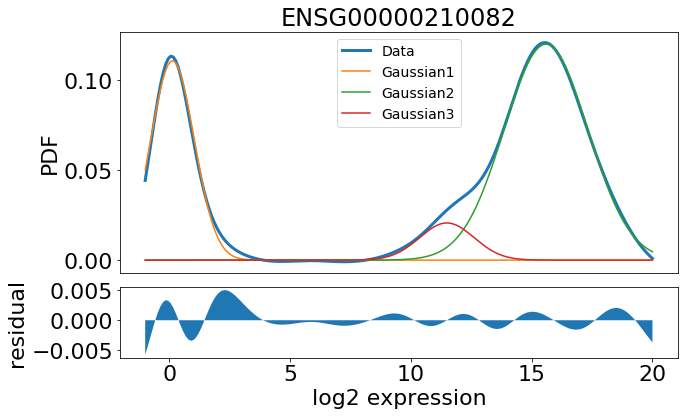

In [352]:
# p0 is the initial guess for the fitting coefficients 
p0 = [.3, 0, 1.,.1, 14, 1.,.03,10,1.]
gene = 'ENSG00000210082'
y_data = pdf_df_skl[gene]-.008
X_data = x_grid
#optimize and in the end you will have 6 coeff (3 for each gaussian)
coeff, var_matrix = curve_fit(gauss3, X_data, y_data, p0=p0)

#you can plot each gaussian separately using 
pg1 = coeff[0:3]
pg2 = coeff[3:6]
pg3 = coeff[6:]

g1 = gauss(X_data, *pg1)
g2 = gauss(X_data, *pg2)
g3 = gauss(X_data, *pg3)

f = plt.figure()
f.set_figheight(6)
f.set_figwidth(10)
gs = gridspec.GridSpec(4,1)
ax1 = f.add_subplot(gs[0:3,0])
ax1.plot(X_data, y_data, label='Data',lw=3)
ax1.plot(X_data, g1, label='Gaussian1')
ax1.plot(X_data, g2, label='Gaussian2')
ax1.plot(X_data, g3, label='Gaussian3')
ax1.legend()
ax1.set_xticks([])
plt.ylabel('PDF');
plt.title(gene)
ax2 = f.add_subplot(gs[3,0])
ax2.fill_between(X_data,0,y_data-(g1+g2+g3),label='residual')
ax2.set_xlabel('log2 expression')
ax2.set_ylabel('residual')
f.savefig('Datasets/TuPaMetaDataDivya/figures/density_gene210082_fit.png')
plt.show()

In [328]:
p0[:-3]

[0.3, 0, 1.0, 0.1, 14, 1.0]

In [1]:

import imp

imp.reload(la)



/home/bojk/miniconda3/envs/py360/lib/python3.6/site-packages/leidenalg-0.7.0.post1+61.g362c2d6-py3.6-linux-x86_64.egg/leidenalg/__init__.py:57: UserWarning: Module leidenalg was already imported from /home/bojk/miniconda3/envs/py360/lib/python3.6/site-packages/leidenalg-0.7.0.post1+61.g362c2d6-py3.6-linux-x86_64.egg/leidenalg/__init__.py, but /home/bojk/Data/leidenalg is being added to sys.path
  from pkg_resources import get_distribution, DistributionNotFound


<module 'leidenalg' from '/home/bojk/miniconda3/envs/py360/lib/python3.6/site-packages/leidenalg-0.7.0.post1+61.g362c2d6-py3.6-linux-x86_64.egg/leidenalg/__init__.py'>

In [370]:
sys.path

['/home/bojk/miniconda3/envs/py360/lib/python36.zip',
 '/home/bojk/miniconda3/envs/py360/lib/python3.6',
 '/home/bojk/miniconda3/envs/py360/lib/python3.6/lib-dynload',
 '',
 '/home/bojk/miniconda3/envs/py360/lib/python3.6/site-packages',
 '/home/bojk/miniconda3/envs/py360/lib/python3.6/site-packages/IPython/extensions',
 '/home/bojk/.ipython',
 '/home/bojk/Data/minimeta_pyfiles/',
 '/home/bojk/Data/minimeta_pyfiles/',
 '/home/bojk/Data/minimeta_pyfiles/']

In [253]:
import leidenalg as la
import igraph as ig
g = ig.Graph([(0, 1), (1, 2), (2, 0), (2, 3), (3, 4)])
partition = la.CPMVertexPartition(g, resolution_parameter=0.5, initial_membership=[0, 0, 1, 2,0])
la.Optimiser().optimise_partition(partition, fixed_nodes=[1, 1,0,0,1])
clusters = partition.membership
print(clusters)

[0, 0, 1, 1, 0]


In [ ]:
"""
1 calc distance matrix 
2 get edges (knn k=5, argmax/min ) so top 5 closest distances including oneself, remove redundancies
3 make graph with igraph
4 optimize and call clusters with leiden alg 
"""

In [28]:
normlog2 = np.log2(norm_all+1)
normlog2_nona = normlog2.dropna(how='all',axis=1)
normENS = normlog2_nona[normlog2_nona.index.str.contains('ENSG')].drop(normENS[normENS.sum(axis=1).sort_values()==0].index)

/home/bojk/miniconda3/envs/py360/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
cellcorr = normENS.corr()

In [657]:
def nearestNeighbors(distance_matrix, NNeighbors):
    newkeys = list(range(len(distance_matrix.index)))
    keys = distance_matrix.index
    celldict = dict(zip(keys,newkeys))
    revdict = dict(zip(newkeys,keys))
    distance_matrix_num = distance_matrix.rename(celldict).rename(celldict,axis=1).copy()
    indices = [];values = [];pairs=[]
    for cell in distance_matrix_num.index:
        valshort = list(distance_matrix_num.loc[cell].sort_values(ascending=False)[1:NNeighbors].values)
        valthresidx = [valshort.index(x) for x in valshort if x>.2]
        inxshort = list(distance_matrix_num.loc[cell].sort_values(ascending=False)[1:NNeighbors].index)
        idxthres = [inxshort[x] for x in valthresidx] # add only pairs with correlation >.2
        indices.append(idxthres)
        values.append(valshort)
        for i in range(len(idxthres)):
            pairs.append((cell,indices[cell][i]))
    gra = ig.Graph(pairs)
    
    indict = dict(zip(newkeys,indices))
    valdict = dict(zip(newkeys,values))
    return indict,valdict,pairs,revdict


In [254]:
import imp 
imp.reload(la)

<module 'leidenalg' from '/home/bojk/miniconda3/envs/py360/lib/python3.6/site-packages/leidenalg-0.7.0.post1+61.g362c2d6-py3.6-linux-x86_64.egg/leidenalg/__init__.py'>

In [352]:
len(gra.degree())


1292

In [350]:
NN = 5
indi,vali,pairs,revdict = nearestNeighbors(cellcorr,NN)
unique_pairs = [tuple(x) for x in set([frozenset(x) for x in pairs])]

In [354]:
def leiden_clustering(meta_tSNE,resolution_parameter)
    unique_pairs = [tuple(x) for x in set([frozenset(x) for x in pairs])]
    gra = ig.Graph(unique_pairs)
    numID = list(range(len(meta_tSNE['annotation'].unique())))
    lut = dict(zip(meta_tSNE['annotation'].unique(),numID))
    meta_tSNE['cellID'] = meta_tSNE['annotation'].map(lut)
    meta_tSNE.loc[cellcorr.index,'betweenness'] = gra.betweenness()
    meta_tSNE.loc[cellcorr.index,'degree'] = gra.degree()
    Orig_ID = list(meta_tSNE.loc[cellcorr.index,'cellID'])
    #respar = 0.0001
    partition = la.CPMVertexPartition(gra, resolution_parameter=resolution_parameter, initial_membership=Orig_ID)
    la.Optimiser().optimise_partition(partition)
    clusters = partition.membership
    print(clusters)
    return(clusters, meta_tSNE)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 6, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
list(set(clusters))
gra.degree()

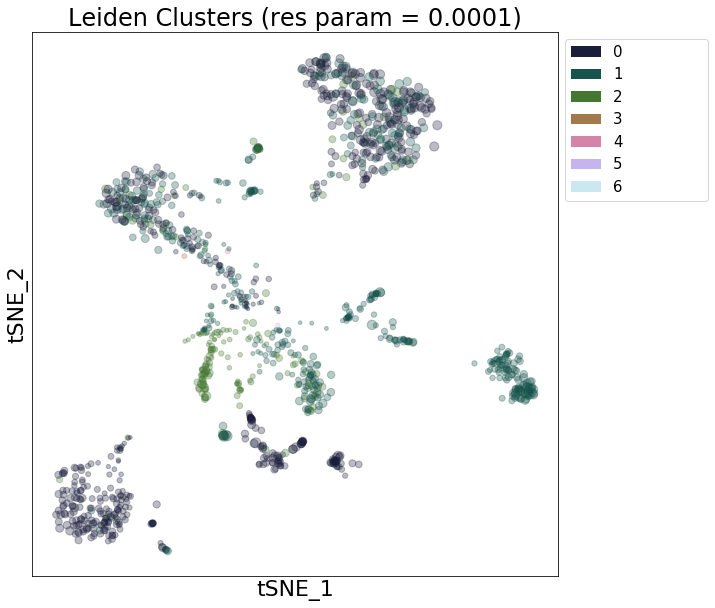

In [355]:
meta_tSNE['new_clusters'] = clusters
meta_tSNE
keys = list(set(clusters)); values = sns.color_palette('cubehelix',len(keys))
lut = dict(zip(keys,values))
colors = meta_tSNE.new_clusters.map(lut)

f = plt.figure()
gs = gridspec.GridSpec(1,1)
ax = f.add_subplot(gs[0,0])
tsne_coords.plot.scatter('tSNE_1','tSNE_2',figsize=(10,10),ax=ax,color=colors,s=meta_tSNE.nGene.divide(80),alpha=.3)#,label=colors.keys)
for x,y in lut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
    plt.legend(handles[:],labels[:],bbox_to_anchor=(1, .9, .3, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.yticks([]);plt.xticks([])
plt.title('Leiden Clusters (res param = '+str(respar)+')')
plt.gcf().subplots_adjust(left=.05,right=0.78)
plt.show()
f.savefig('Datasets/TuPaMetaDataDivya/figures/tSNE_newLeidenClusters_resPar='+str(respar)+'NN='+str(NN)+'.png')

/home/bojk/miniconda3/envs/py360/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log2
  


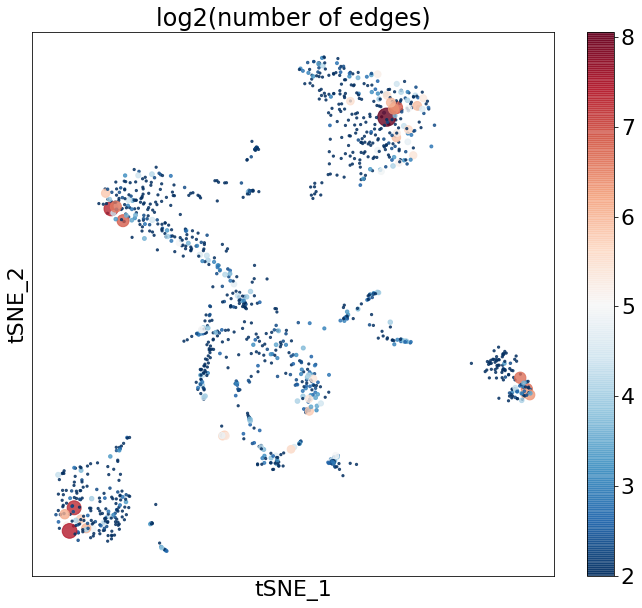

In [358]:
#meta_tSNE['top40genes_log2'] = np.log2(top40.sum(axis=0)+1)
#meta_tSNE['top40genesnorm_log2'] = np.log2(normtop40.sum(axis=0)+1)

f,ax = plt.subplots()
meta_tSNE.plot.scatter('tSNE_1','tSNE_2',figsize=(12,10),ax=ax,s=meta_tSNE['degree'].divide(.8)
                       ,alpha=.8,cmap='RdBu_r',c=np.log2(meta_tSNE['degree']))
plt.yticks([]);plt.xticks([])
plt.title('log2(number of edges)')
plt.gcf().subplots_adjust(right=0.88)
plt.show()
f.savefig('Datasets/TuPaMetaDataDivya/figures/tSNE_LeidenDegree_resPar='+str(respar)+'NN='+str(NN)+'.png')

/home/bojk/miniconda3/envs/py360/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log2
  if sys.path[0] == '':


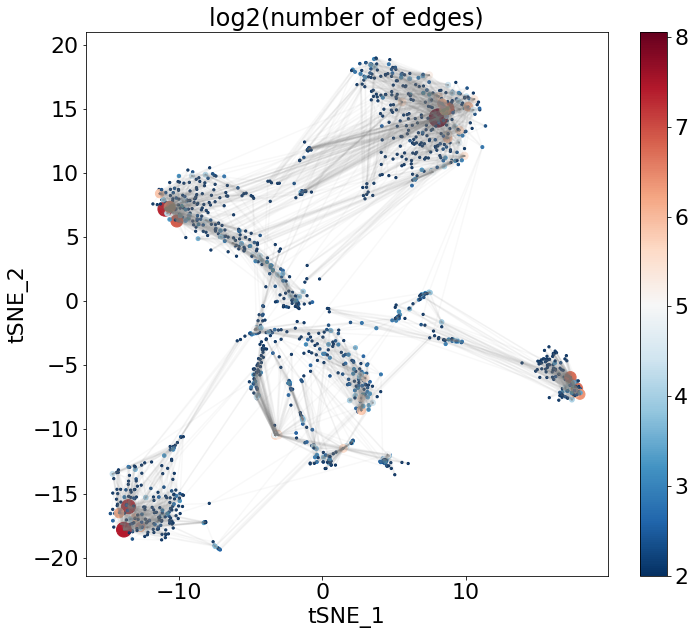

In [362]:


    
f,ax = plt.subplots()
for pair in unique_pairs:
    xy1 = meta_tSNE.loc[revdict[pair[0]],['tSNE_1','tSNE_2']]
    xy2 = meta_tSNE.loc[revdict[pair[1]],['tSNE_1','tSNE_2']]
    ax.plot([xy1[0],xy2[0]],[xy1[1],xy2[1]],alpha=.05
            ,c='gray')

meta_tSNE.plot.scatter('tSNE_1','tSNE_2',figsize=(12,10),ax=ax,s=meta_tSNE.degree.divide(.8)
                       ,alpha=1,cmap='RdBu_r',c=np.log2(meta_tSNE.degree))
#plt.yticks([]);plt.xticks([])
plt.title('log2(number of edges)')
plt.gcf().subplots_adjust(right=0.88)
plt.show()
f.savefig('Datasets/TuPaMetaDataDivya/figures/tSNE_LeidenDegree_allEdges_resPar='+str(respar)+'NN='+str(NN)+'.png')

In [319]:
#unique_pairs
#gra.degree()[:100]

In [317]:
meta_tSNE[:100]

,nGene,nReads,orig.ident,Tumor,Plate,Well,S,percent.mito,percent.ERCC,percent.ribo,res.1,oldIdent,annotation,tSNE_1,tSNE_2,cellID,new_clusters,betweenness,degree
TuPa1_Plate2_B10_S000,3487,359151,TuPa1,TuPa1,Plate2,B10,S000,0.031750,0.054845,0.010291,11,11,Mesen1,16.024758,-4.296897,0,1,0.0,1
TuPa1_Plate2_G3_S000,3669,93115,TuPa1,TuPa1,Plate2,G3,S000,0.056586,0.048078,0.015218,11,11,Mesen1,16.758752,-5.378935,0,1,0.0,1
TuPa1_Plate2_C7_S000,3416,123935,TuPa1,TuPa1,Plate2,C7,S000,0.034445,0.039852,0.013297,11,11,Mesen1,16.047937,-4.953026,0,1,0.0,1
TuPa1_Plate2_H5_S000,2655,142586,TuPa1,TuPa1,Plate2,H5,S000,0.047985,0.085329,0.016390,11,11,Mesen1,15.600643,-4.512714,0,1,0.0,1
TuPa1_Plate2_B3_S000,2893,132529,TuPa1,TuPa1,Plate2,B3,S000,0.083461,0.085717,0.016479,11,11,Mesen1,15.184382,-4.821161,0,11,6.0,2
TuPa1_Plate2_F3_S000,3634,88774,TuPa1,TuPa1,Plate2,F3,S000,0.089328,0.057341,0.021808,11,11,Mesen1,16.879646,-4.489246,0,1,0.0,1
TuPa1_Plate2_B8_S000,2828,269238,TuPa1,TuPa1,Plate2,B8,S000,0.066618,0.146324,0.023797,11,11,Mesen1,14.994342,-4.665543,0,1,0.0,1
TuPa1_Plate2_A9_S000,3004,179108,TuPa1,TuPa1,Plate2,A9,S000,0.071677,0.091053,0.019424,11,11,Mesen1,16.078759,-4.104250,0,1,0.0,1
TuPa1_Plate2_B1_S000,3636,183623,TuPa1,TuPa1,Plate2,B1,S000,0.064573,0.055520,0.018952,11,11,Mesen1,16.095806,-5.220542,0,1,0.0,1
TuPa1_Plate2_B4_S000,3305,167441,TuPa1,TuPa1,Plate2,B4,S000,0.061950,0.068468,0.019123,11,11,Mesen1,15.734408,-4.949754,0,1,0.0,1


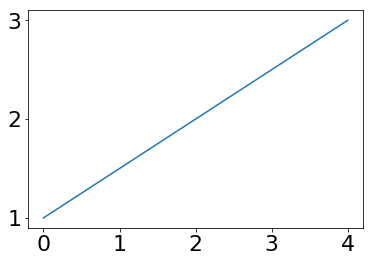

In [196]:
plt.plot([0,4],[1,3])

[(1184, 943),
 (94, 39),
 (1049, 980),
 (368, 375),
 (821, 726),
 (586, 483),
 (384, 426),
 (435, 597),
 (98, 146),
 (265, 217)]

In [85]:
indic = []
for i in range(4):
    indic.append((0,indi[0][i]))
indi[0]

[99, 94, 156, 72]

In [57]:

cellcorr.index.get_loc(cellcorr.loc['NuPa22_P3_A10_S262'].sort_values(ascending=False).index[1])

99

In [56]:
cellcorr.loc['NuPa22_P3_A10_S262'].sort_values(ascending=False).index[1]

'NuPa22_P3_H6_S126'

In [60]:
newk = list(range(len(cellcorr.index)))
ke = cellcorr.index
di = dict(zip(ke,newk))

Text(0.5, 0, 'average expression per cell')

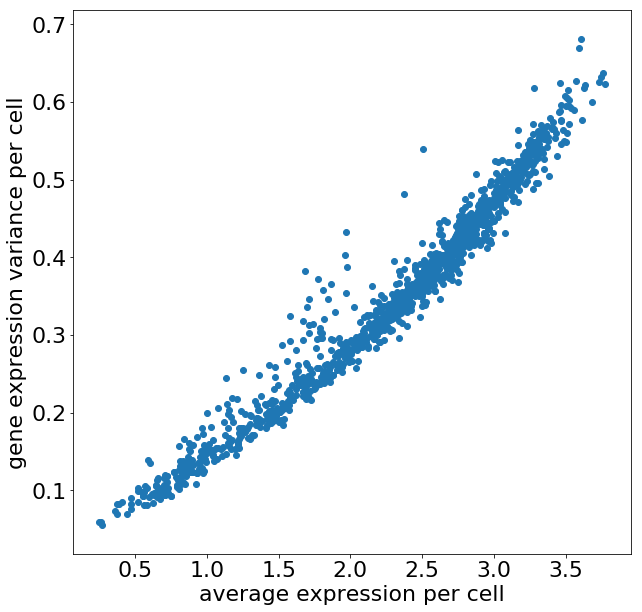

In [275]:
f = plt.figure(figsize=(10,10))
plt.scatter(normlog2_nona.var(),normlog2_nona.mean())
plt.ylabel('gene expression variance per cell')
plt.xlabel('average expression per cell')

Text(0.5, 0, 'average expression per gene (log2(count+1))')

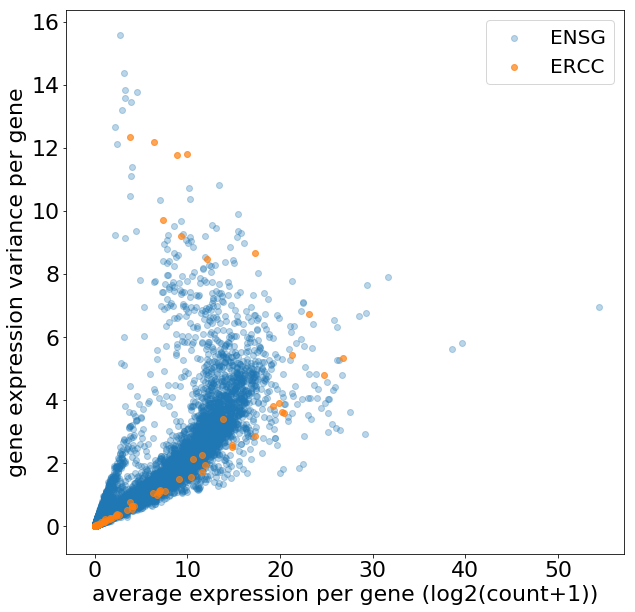

In [281]:
f = plt.figure(figsize=(10,10))
plt.scatter(normlog2_nona[normlog2_nona.index.str.contains('ENSG')].var(axis=1),normlog2_nona[normlog2_nona.index.str.contains('ENSG')].mean(axis=1),alpha=.3,label='ENSG')
plt.scatter(normlog2_nona[normlog2_nona.index.str.contains('ERCC')].var(axis=1),normlog2_nona[normlog2_nona.index.str.contains('ERCC')].mean(axis=1),alpha=.7,label='ERCC')
plt.legend(fontsize=20)
plt.ylabel('gene expression variance per gene')
plt.xlabel('average expression per gene (log2(count+1))')

In [284]:
normlog2_nona.index.str[:4].value_counts()

ENSG    54150
ERCC       94
__no        1
NIST        1
__al        1
__am        1
dtype: int64

In [555]:
#normlog2_nona

In [363]:
counttable = pd.read_csv('Datasets/AdultAgingPancForCIRM/AdultAgeingCountTable.csv',index_col=0)

In [427]:
met.head()

,unique_key,Unnamed: 1,,Key,age,c1_chip_id,capture_position,chip_type,concentration,enrichment_method,...,number_dead_cells,number_live_cells,number_of_cells,organism,plate_nr,sample_recieve_date,sub_tissue,tissue,tissue_type,total_reads
0,1000010011.A01,NaN,NaN,NaN,21,1000010011,A01,NaN,NaN,islet,...,NaN,NaN,NaN,human,NaN,141021.0,NaN,pancreas,adult,822828
1,1000010011.A02,NaN,NaN,NaN,21,1000010011,A02,NaN,NaN,islet,...,NaN,NaN,NaN,human,NaN,141021.0,NaN,pancreas,adult,1269102
2,1000010011.A03,NaN,NaN,NaN,21,1000010011,A03,NaN,NaN,islet,...,NaN,NaN,NaN,human,NaN,141021.0,NaN,pancreas,adult,1697880
3,1000010011.A04,NaN,NaN,NaN,21,1000010011,A04,NaN,NaN,islet,...,NaN,NaN,NaN,human,NaN,141021.0,NaN,pancreas,adult,1576145
4,1000010011.A05,NaN,NaN,NaN,21,1000010011,A05,NaN,NaN,islet,...,NaN,NaN,NaN,human,NaN,141021.0,NaN,pancreas,adult,1477465


In [428]:
met = pd.read_csv('Datasets/AdultAgingPancForCIRM/pancreas_adult_annotation_table.csv')
met['idx'] = met['c1_chip_id'].astype(str)+'.'+met['capture_position']
met.set_index('idx',inplace=True)

In [429]:
met.dropna(how='all',axis=1).iloc[0]#.inferred_tissue_type.value_counts()

unique_key               1000010011.A01
Key                                 NaN
age                                  21
c1_chip_id                   1000010011
capture_position                    A01
chip_type                           NaN
enrichment_method                 islet
experiment_name         panc_21y_141021
experimenter                     martin
fragAnalyzerRange                   NaN
gene_body_coverage              0.64971
inferred_tissue_type               none
intron_exon_ratio               67.2559
mapped_reads                     686835
nCells                              NaN
ng.ul                               NaN
organism                          human
plate_nr                            NaN
sample_recieve_date              141021
tissue                         pancreas
tissue_type                       adult
total_reads                      822828
Name: 1000010011.A01, dtype: object

In [531]:
normCount = counttable.dropna(how='all',axis=1).divide(met.loc[counttable.dropna(how='all',axis=1).T.index].mapped_reads).multiply(1e6)
yax = normCount.T.var().divide(normCount.T.mean())
xax = normCount.T.mean()

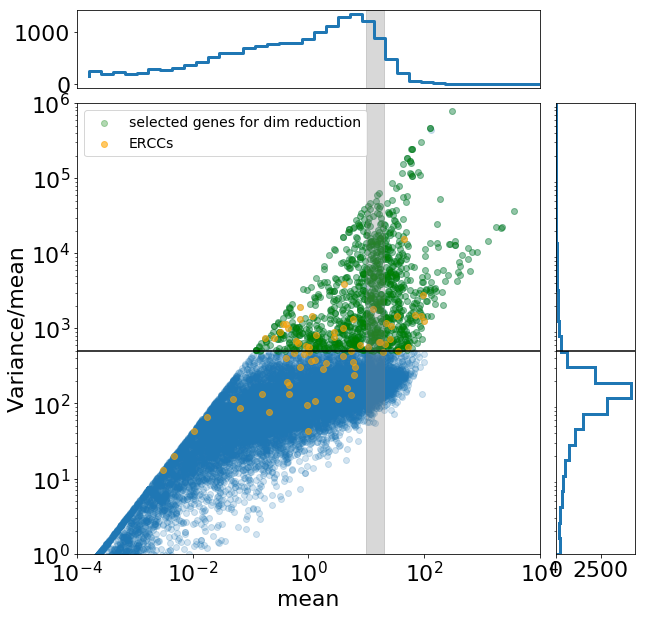

In [616]:
f = plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(6,6)

ax1 = f.add_subplot(gs[1:,:-1])
ercc = xax[xax.index.str.contains("ERCC")].index
ax1.axvspan(10,20,color='gray',alpha=.3,label=None)
ax1.scatter(xax,yax,alpha=.2,label=None)
ax1.scatter(xax.loc[selection.index],yax.loc[selection.index],alpha=.3,color='g',label='selected genes for dim reduction')
ax1.scatter(xax.loc[ercc],yax.loc[ercc],alpha=.6,color='orange',label='ERCCs')
ax1.set_xscale('log');ax1.set_yscale('log')
ax1.set_xlim(1e-4,1e4)
ax1.set_ylim(1,1e6)
ax1.axhline(5e2,color='k',label=None)
ax1.legend()

ax2 = f.add_subplot(gs[0,:-1])
bins = np.logspace(-4,4,40)
counts, bin_edges = np.histogram(xax,bins=bins)
exp_centers = []
for i in range(len(counts)):
    exp_centers.append((np.log10(bin_edges)[i]+np.log10(bin_edges)[i+1])/2)
bin_centers = [10**f for f in exp_centers]


ax2.step(bin_edges[1:],counts,linewidth=3)
ax2.set_xlim(1e-4,1e4)
ax2.set_xscale('log')#,ax2.set_yscale('log')
ax2.set_xticks([])
ax2.axvspan(10,20,color='gray',alpha=.3,label=None)
ax3 = f.add_subplot(gs[1:,-1])
bins2 = np.logspace(0,6,30)
counts, bin_edges = np.histogram(yax,bins=bins2)

#counts = np.histogram(xax,bins=bins)
ax3.hist(yax,bins=bins2,orientation='horizontal',histtype='step',linewidth=3)
ax3.set_ylim(1,1e6)#,ax3.set_xlim(-2,10)
ax3.set_yscale('log')#;ax3.set_xscale('log')
ax3.set_yticks([])
ax3.axhline(5e2,color='k')

ax1.set_ylabel('Variance/mean')
ax1.set_xlabel('mean')
f.savefig('Datasets/AdultAgingPancForCIRM/fano.png')

In [ ]:
"""
select > 500
remove list of genes (IG, TR HLA mito XYchrom ribo)
log transform
PCA
tSNE

tSNE of transformed matrix

"""

/home/bojk/miniconda3/envs/py360/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app


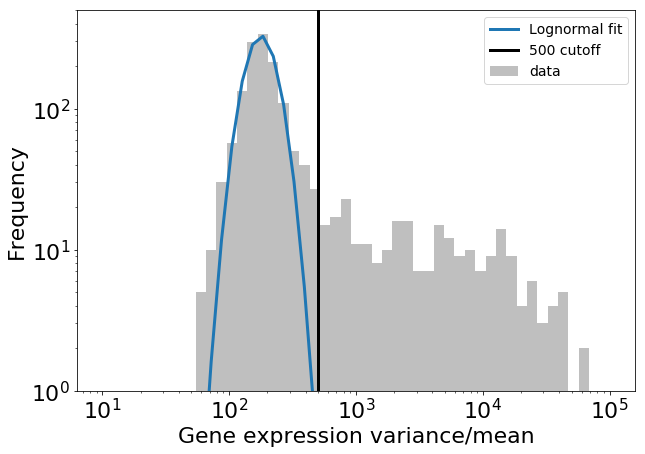

In [584]:
f = plt.figure(figsize=(10,7))
idx = xax[(xax>=10)&(xax<=20)].index
ibns = np.logspace(1,5,50)
counts,bin_edges = np.histogram(yax.loc[idx],bins=ibns)
yax.loc[idx].plot.hist(bins=ibns,alpha=.5,label='data',color='gray')
plt.xscale('log'),plt.yscale('log')
plt.ylim(1e-0,5e2)

exp_centers = []
for i in range(len(counts)):
    exp_centers.append((np.log10(bin_edges)[i]+np.log10(bin_edges)[i+1])/2)
bin_centers = [10**f for f in exp_centers]
coeff, var_matrix = curve_fit(gauss, exp_centers, counts, p0=[300,2.3,.2])
g1 = gauss(exp_centers, *coeff)
g1_log = [10**f for f in g1]
plt.plot(bin_centers, g1, label='Lognormal fit',linewidth=3)
plt.xlabel('Gene expression variance/mean')
plt.axvline(5e2,color='k',linewidth=3,label='500 cutoff')
#plt.title('Mean gene expression between 10&20 counts*1e-6 reads')
plt.legend()
f.savefig('Datasets/AdultAgingPancForCIRM/hist_meanexpr10-20cpm.png')

In [619]:
selection = yax[yax>=500]
exclude = ['ERCC','TRA','TRB','HLA','HLB','HLC','RPL','RPS','IGV','IGD','IGJ']

exclist = []
for partstr in exclude:
    exclist += list(selection[selection.index.str.contains(partstr)].index)

selection = selection[~selection.index.isin(exclist)]
idx = selection.index


In [646]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

log2 = np.log2(normCount.loc[idx]+.1)
log2.dropna(how='all',axis=1,inplace=True)


x = StandardScaler().fit_transform(log2.T)
pca = PCA(n_components=100)
principalComp = pca.fit_transform(x)
princdf = pd.DataFrame(principalComp)
princdf.index =log2.T.index

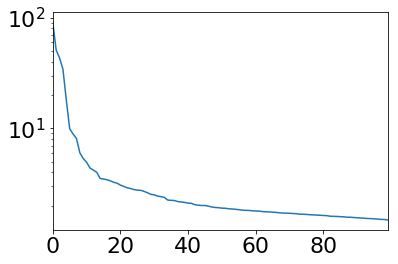

In [647]:
princdf.var().plot()
plt.yscale('log')

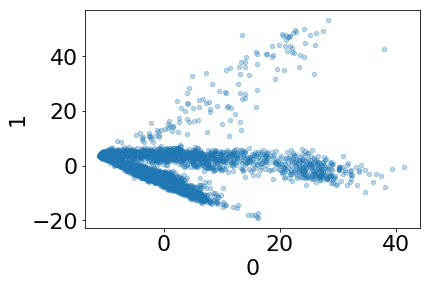

In [652]:
princdf.plot.scatter(0,1,alpha=.3)

In [649]:
    x_emb = TSNE(n_components=2,perplexity=40,random_state=23944).fit_transform(princdf.values)
    tsnedf = pd.DataFrame(x_emb,index=princdf.index)
    

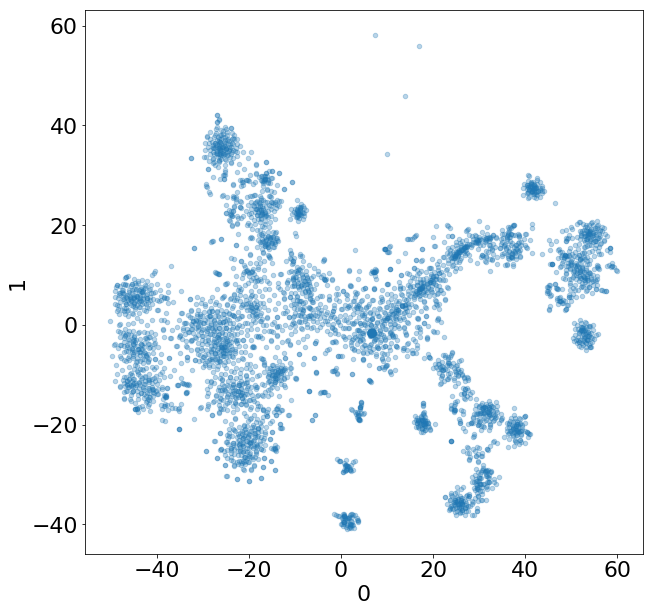

In [654]:
f,ax = plt.subplots(figsize=(10,10))
tsnedf.plot.scatter(0,1,alpha=.3,ax=ax)

In [658]:
cell_corr = log2.corr()

In [666]:
from scipy.spatial.distance import pdist, squareform
from fastcluster import linkage
from polo import optimal_leaf_ordering

def _optimal_order(data, **kwargs):
    """ Optimal leaf ordering
        **kwargs passed to pdist e.g. metric='correlation'
    """
    d = pdist(data, **kwargs)
    link = linkage(d, method='average')
    optimal_order = optimal_leaf_ordering(link, d)
    return optimal_order



In [ ]:
f = plt.figure(figsize=(12,10))
#sns.heatmap(cell_corr,linewidths=0)
D = pdist(cell_corr, 'euclidean')
Z = linkage(D, 'ward')
row_link = _optimal_order(cell_corr, metric='correlation')

optimal_Z = optimal_leaf_ordering(Z, D)
cg = sns.clustermap(cell_corr, row_linkage=row_link, col_linkage=row_link,figsize=(20,40),xticklabels=False)
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)

In [ ]:
cell_corr.head()
f.savefig('Datasets/AdultAgingPancForCIRM/heatmap_corr_ordered.png')

In [656]:

NN = 5
indi,vali,pairs,revdict = nearestNeighbors(cell_corr,NN)

,1000010011.A01,1000010011.A02,1000010011.A03,1000010011.A04,1000010011.A05,1000010011.A06,1000010011.A07,1000010011.A08,1000010011.A09,1000010011.A10,...,1000103103.H10,1000103103.H11,1000103103.H2,1000103103.H3,1000103103.H4,1000103103.H5,1000103103.H6,1000103103.H7,1000103103.H8,1000103103.H9
1000010011.A01,1.000000,0.212806,0.384842,0.122968,0.269894,0.271066,0.330468,0.406952,0.316524,0.454645,...,0.276676,0.053219,0.074188,0.199101,0.063253,0.204738,0.189278,0.234346,0.171262,0.071775
1000010011.A02,0.212806,1.000000,0.157700,0.098446,0.202012,0.262642,0.266166,0.279763,0.193372,0.230706,...,0.247780,0.008834,0.059440,0.185914,0.057493,0.238941,0.227581,0.163560,0.193888,-0.033024
1000010011.A03,0.384842,0.157700,1.000000,0.260698,0.270682,0.292661,0.233164,0.460043,0.237758,0.406106,...,0.212196,0.074698,0.147000,0.209947,-0.002155,0.185006,0.177511,0.184346,0.203527,0.102288
1000010011.A04,0.122968,0.098446,0.260698,1.000000,0.168498,0.189459,0.228024,0.266536,0.220035,0.198801,...,0.109088,0.047575,0.065931,0.166965,0.007590,0.183676,0.095956,0.111707,0.162633,0.038852
1000010011.A05,0.269894,0.202012,0.270682,0.168498,1.000000,0.344261,0.252922,0.331702,0.240650,0.291996,...,0.142512,-0.011399,0.012822,0.177966,-0.053425,0.177415,0.174435,0.122362,0.141147,0.062318
1000010011.A06,0.271066,0.262642,0.292661,0.189459,0.344261,1.000000,0.306560,0.375181,0.305648,0.347950,...,0.267023,0.039458,0.178926,0.224627,0.027730,0.286557,0.246089,0.246246,0.194326,0.094073
1000010011.A07,0.330468,0.266166,0.233164,0.228024,0.252922,0.306560,1.000000,0.376370,0.321180,0.320091,...,0.292292,0.015172,0.130749,0.336342,0.042858,0.282371,0.280185,0.262081,0.266196,0.023617
1000010011.A08,0.406952,0.279763,0.460043,0.266536,0.331702,0.375181,0.376370,1.000000,0.303091,0.458965,...,0.303216,0.046673,0.079421,0.280265,0.037730,0.250182,0.290953,0.288345,0.237830,0.081448
1000010011.A09,0.316524,0.193372,0.237758,0.220035,0.240650,0.305648,0.321180,0.303091,1.000000,0.347963,...,0.285768,0.025770,0.123602,0.234528,0.001808,0.299920,0.281421,0.250587,0.210248,0.144845
1000010011.A10,0.454645,0.230706,0.406106,0.198801,0.291996,0.347950,0.320091,0.458965,0.347963,1.000000,...,0.268611,0.043432,0.111698,0.237692,-0.020024,0.297815,0.303907,0.285757,0.225730,0.059771


In [549]:

#met.mapped_reads.sort_values()
yax.sort_values(ascending=False)
#yax[yax.isna()]
xax.sort_values()
#met.mapped_reads.sort_values()
#counttable.dropna(how='all',axis=1).dropna(how='all',axis=0)
counttable.T.mean()
xax[xax.index.str.contains("ERCC")]

BIVM-ERCC5      0.003101
ERCC-00002           inf
ERCC-00003           inf
ERCC-00004           inf
ERCC-00009           inf
ERCC-00012      0.369454
ERCC-00013      1.105900
ERCC-00014      4.117158
ERCC-00016      0.323160
ERCC-00017      0.728152
ERCC-00019     35.695190
ERCC-00022           inf
ERCC-00024      0.159230
ERCC-00025     89.669613
ERCC-00028      5.835040
ERCC-00031      2.730171
ERCC-00033      2.807963
ERCC-00034     22.001661
ERCC-00035    100.652824
ERCC-00039      5.501327
ERCC-00040      1.287884
ERCC-00041      0.608021
ERCC-00042           inf
ERCC-00043           inf
ERCC-00044           inf
ERCC-00046           inf
ERCC-00048      0.017485
ERCC-00051           inf
ERCC-00053     34.648397
ERCC-00054      1.303481
                 ...    
ERCC-00136           inf
ERCC-00137      0.467925
ERCC-00138      0.251974
ERCC-00142      0.066023
ERCC-00143      7.754614
ERCC-00144     44.808382
ERCC-00145           inf
ERCC-00147      0.657115
ERCC-00148      6.341836


In [418]:
counttable.columns = counttable.columns.str[1:]

In [414]:
#variance over average expression 
#cutoff
met.index

Index(['1000010011.A01', '1000010011.A02', '1000010011.A03', '1000010011.A04',
       '1000010011.A05', '1000010011.A06', '1000010011.A07', '1000010011.A08',
       '1000010011.A09', '1000010011.A10',
       ...
       '1000103103.H10', '1000103103.H11', '1000103103.H2', '1000103103.H3',
       '1000103103.H4', '1000103103.H5', '1000103103.H6', '1000103103.H7',
       '1000103103.H8', '1000103103.H9'],
      dtype='object', name='unique_key', length=4234)

In [432]:
counttable.divide(met.mapped_reads)

,1000010011.A01,1000010011.A02,1000010011.A03,1000010011.A04,1000010011.A05,1000010011.A06,1000010011.A07,1000010011.A08,1000010011.A09,1000010011.A10,...,1000103103.H10,1000103103.H11,1000103103.H2,1000103103.H3,1000103103.H4,1000103103.H5,1000103103.H6,1000103103.H7,1000103103.H8,1000103103.H9
1/2-SBSRNA4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
A1BG,0.000000,0.000000,0.000000,0.000000,0.000000,0.000002,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000012,0.000000,0.000024,0.000000,0.000000,0.000000,0.00000
A1BG-AS1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.689011e-07,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
A1CF,0.000000,0.000000,0.000153,0.000113,0.000089,0.000000,0.000000,0.000000e+00,0.000130,0.000000,...,0.000103,0.000000,0.000454,0.000000,0.000000,0.000339,0.000027,0.000183,0.000000,0.00000
A2LD1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000021,0.000000,0.000000,0.00000
A2M,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
A2ML1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
A2MP1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
A4GALT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
A4GNT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
